In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os

In [25]:
data='/content/drive/MyDrive/face detection/fer2013.csv'
label=['anger','disgust','fear','happy','sad','suprised','neutral']
names=['emotions', 'pixels','usage']
df=pd.read_csv('/content/drive/MyDrive/face detection/fer2013.csv',names=names,na_filter=False)
im=df['pixels']
df.head(10)

,emotions,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35888 entries, 0 to 35887
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotions  35888 non-null  object
 1   pixels    35888 non-null  object
 2   usage     35888 non-null  object
dtypes: object(3)
memory usage: 841.2+ KB


In [27]:
Y = []
X = []
first = True
for line in open(data):
  if first:
    first = False
  else:
    row = line.split(',')
    Y.append(int(row[0]))
    X.append([int(p) for p in row[1].split()])

X, Y = np.array(X) / 255.0, np.array(Y)


In [28]:
X

array([[0.2745098 , 0.31372549, 0.32156863, ..., 0.41568627, 0.42745098,
        0.32156863],
       [0.59215686, 0.58823529, 0.57647059, ..., 0.75686275, 0.71764706,
        0.72156863],
       [0.90588235, 0.83137255, 0.61176471, ..., 0.34509804, 0.43137255,
        0.59607843],
       ...,
       [0.06666667, 0.06666667, 0.0627451 , ..., 0.60392157, 0.52156863,
        0.44313725],
       [0.11764706, 0.10980392, 0.10980392, ..., 0.1372549 , 0.11764706,
        0.10980392],
       [0.0745098 , 0.05098039, 0.05490196, ..., 0.74117647, 0.78039216,
        0.78823529]])

In [29]:
Y

array([0, 0, 2, ..., 0, 3, 2])

In [30]:
num_class = len(set(Y))
print(num_class)



7


In [31]:
X.shape

(35887, 2304)

In [32]:
X = X.reshape(-1, 48, 48, 1)

In [33]:
X

array([[[[0.2745098 ],
         [0.31372549],
         [0.32156863],
         ...,
         [0.20392157],
         [0.16862745],
         [0.16078431]],

        [[0.25490196],
         [0.23921569],
         [0.22745098],
         ...,
         [0.21960784],
         [0.20392157],
         [0.17254902]],

        [[0.19607843],
         [0.16862745],
         [0.21176471],
         ...,
         [0.19215686],
         [0.21960784],
         [0.18431373]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.16470588],
         ...,
         [0.28235294],
         [0.21960784],
         [0.16862745]],

        [[0.30196078],
         [0.32156863],
         [0.30980392],
         ...,
         [0.41176471],
         [0.2745098 ],
         [0.18039216]],

        [[0.30196078],
         [0.28235294],
         [0.32941176],
         ...,
         [0.41568627],
         [0.42745098],
         [0.32156863]]],


       [[[0.59215686],
         [0.58823529],
         [0.57

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=0)

In [75]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test= encoder.transform(y_test.reshape(-1, 1))

In [64]:
y_train

array([0, 4, 3, ..., 3, 4, 1])

In [73]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)


In [62]:
y_train

array([0, 4, 3, ..., 3, 4, 1])

In [37]:
from keras.models import Sequential
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

In [40]:
model = keras.Sequential()
input_shape = (48,48,1)
model.add(keras.layers.Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(keras.layers.Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense((128),activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense((7), activation='softmax'))


In [41]:
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_15 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 128)      

In [43]:
from keras.callbacks import ReduceLROnPlateau

ca = ReduceLROnPlateau(monitor='loss', factor=.4, verbose=0, patience=2, min_lr=.000001)
hist = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[ca])

Epoch 1/20
505/505 [==============================] - 27s 40ms/step - loss: 1.7939 - accuracy: 0.3235 - val_loss: 1.6964 - val_accuracy: 0.3285 - lr: 0.0010
Epoch 2/20
505/505 [==============================] - 18s 35ms/step - loss: 1.3963 - accuracy: 0.4698 - val_loss: 1.3154 - val_accuracy: 0.5032 - lr: 0.0010
Epoch 3/20
505/505 [==============================] - 18s 35ms/step - loss: 1.2177 - accuracy: 0.5428 - val_loss: 1.1565 - val_accuracy: 0.5542 - lr: 0.0010
Epoch 4/20
505/505 [==============================] - 18s 35ms/step - loss: 1.0757 - accuracy: 0.5963 - val_loss: 1.2276 - val_accuracy: 0.5467 - lr: 0.0010
Epoch 5/20
505/505 [==============================] - 18s 35ms/step - loss: 0.9793 - accuracy: 0.6335 - val_loss: 1.1858 - val_accuracy: 0.5653 - lr: 0.0010
Epoch 6/20
505/505 [==============================] - 17s 35ms/step - loss: 0.8750 - accuracy: 0.6761 - val_loss: 1.2139 - val_accuracy: 0.5768 - lr: 0.0010
Epoch 7/20
505/505 [==============================] - 17s 

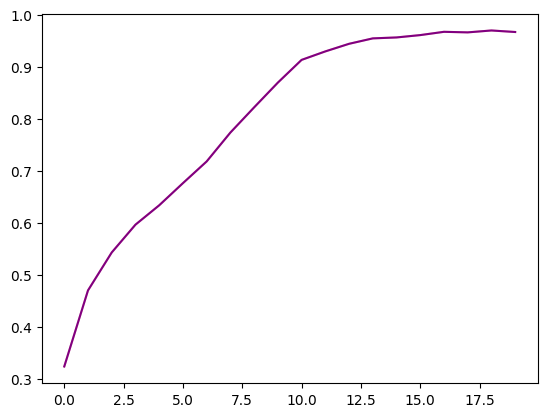

In [47]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
plt.plot(acc,color='pink')
plt.plot(acc,color='purple')

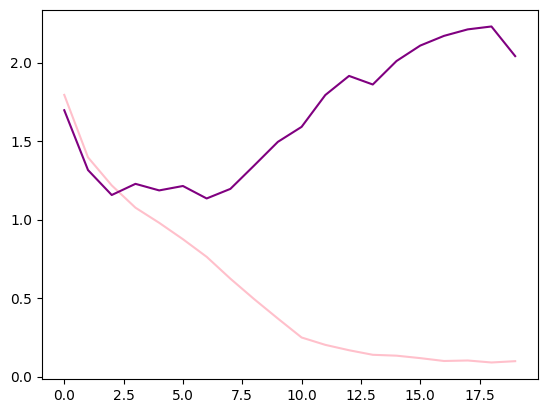

In [49]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
plt.plot(loss,color='pink')
plt.plot(val_loss,color='purple')

In [50]:
x_test.shape,y_test.shape

((3589, 48, 48, 1), (3589,))

In [51]:
x_train.shape,y_train.shape

((32298, 48, 48, 1), (32298,))

In [53]:
pred_test=model.predict(x_test)

113/113 [==============================] - 1s 7ms/step
